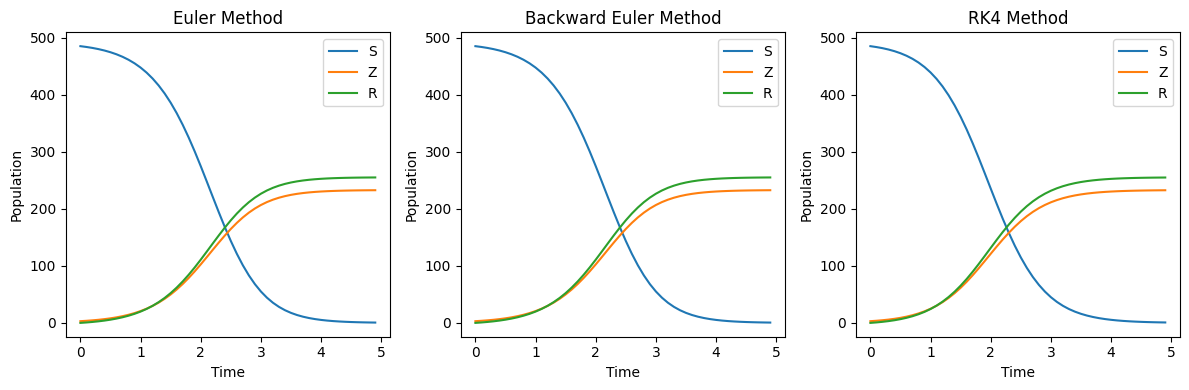

In [21]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.005  # zombie destruction rate
beta = 0.0095  # new zombie rate
zeta = 0.0003  # zombie resurrection rate
delta = 0.0003  # background death rate

N = 500       # initial population size
S0 = N - 15   # initial susceptible population
Z0 = 3      # initial zombie population
R0 = 0       # initial removed population

# here are time points for simulation
T = 5   # just simulation time
dt = 0.1  # and time step
t = np.arange(0, T, dt)

# here's the system of ODEs
def zombie_model(y, t, alpha, beta, zeta, delta):
    S, Z, R = y
    dSdt = -beta * S * Z - delta * S
    dZdt = beta * S * Z + zeta * R - alpha * S * Z
    dRdt = delta * S + alpha * S * Z - zeta * R
    return np.array([dSdt, dZdt, dRdt])

# euler Method
def euler_method(f, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        y[i + 1] = y[i] + dt * f(y[i], t[i], *args)
    return y

# backward Euler Method but just an approximation
def backward_euler_method(f, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        y[i + 1] = y[i] + dt * f(y[i], t[i], *args)  
    return y

# RK4
def rk4_method(f, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        k1 = dt * f(y[i], t[i], *args)
        k2 = dt * f(y[i] + 0.5 * k1, t[i] + 0.5 * dt, *args)
        k3 = dt * f(y[i] + 0.5 * k2, t[i] + 0.5 * dt, *args)
        k4 = dt * f(y[i] + k3, t[i] + dt, *args)
        y[i + 1] = y[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

# this is initial condition array
y0 = [S0, Z0, R0]  

# solve using each method
solution_euler = euler_method(zombie_model, y0, t, args=(alpha, beta, zeta, delta))
solution_backward_euler = backward_euler_method(zombie_model, y0, t, args=(alpha, beta, zeta, delta))
solution_rk4 = rk4_method(zombie_model, y0, t, args=(alpha, beta, zeta, delta))

# and finally plotting the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(t, solution_euler[:, 0], label='S')
plt.plot(t, solution_euler[:, 1], label='Z')
plt.plot(t, solution_euler[:, 2], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Euler Method')
plt.legend()

plt.subplot(132)
plt.plot(t, solution_backward_euler[:, 0], label='S')
plt.plot(t, solution_backward_euler[:, 1], label='Z')
plt.plot(t, solution_backward_euler[:, 2], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Backward Euler Method')
plt.legend()

plt.subplot(133)
plt.plot(t, solution_rk4[:, 0], label='S')
plt.plot(t, solution_rk4[:, 1], label='Z')
plt.plot(t, solution_rk4[:, 2], label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('RK4 Method')
plt.legend()

plt.tight_layout()
plt.show()